<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/AutoEncoder_GAN_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

tf.random.set_seed(42)
np.random.seed(42)

#UnderComplete_AutoEncoder_PCA

In [ ]:
#3 -> 2
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])
#2 -> 3
decoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[2])
])
autoencoder = keras.models.Sequential([
    encoder,
    decoder
])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [ ]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m,3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

    return data

X_train = generate_3d_data(60)
#(3, )
#print(X_train.mean(axis=0, keepdims=0).shape)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 9ms/step - loss: 0.3131
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2919
Epoch 3/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2724
Epoch 4/20
2/2 [==============================] - 0s 10ms/step - loss: 0.2553
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2375
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: 0.2207
Epoch 7/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2049
Epoch 8/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1896
Epoch 9/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1756
Epoch 10/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1616
Epoch 11/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1488
Epoch 12/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1371
Epoch 13/20
2/2 [==============================] - 0s 7ms/step - loss: 

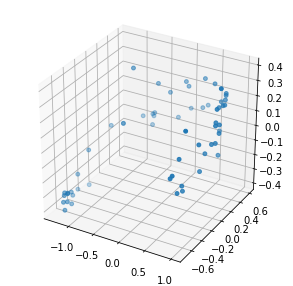

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

# scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
# 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
# marker = 점의 형태
# s = 점의 크기
# c = 점의 색깔
ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2], marker='o', s=15)

plt.show()

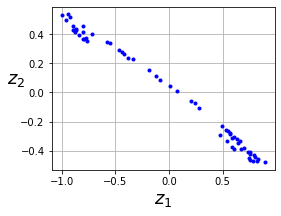

In [ ]:
codings = encoder.predict(X_train)

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# StackedAutoEncoder_Fastion_MNIST

In [2]:
(X, y), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = X.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

X_train, X_valid = X[:-5000], X[-5000:]
y_train, y_valid = y[:-5000], y[-5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28]),
])

stacked_autoencoder = keras.models.Sequential([
    stacked_encoder,
    stacked_decoder
])

#binary_crossentropy 손실을 사용함. 재구성 작업을 다중 레이블 이진 분류로 다룬다.
stacked_autoencoder.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
history = stacked_autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3374 - val_loss: 0.3181
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3049 - val_loss: 0.3011
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2981 - val_loss: 0.2981
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2941 - val_loss: 0.2940
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2914 - val_loss: 0.2913
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2894 - val_loss: 0.2898
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2878 - val_loss: 0.2889
Epoch 8/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2866 - val_loss: 0.2925
Epoch 9/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2857 - val_loss: 0.2872
Epoch 10/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.284

#Fashion_MNIST_Visualization

In [10]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        

In [ ]:
show_reconstructions(stacked_autoencoder)

#Dimention_Reduction_AutoEncoder_And_TSEN

In [ ]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
#정규화
X_valid_2D_norm = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


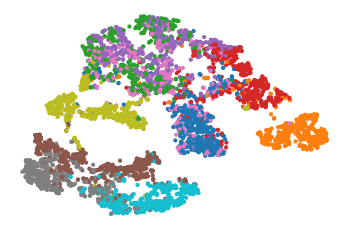

In [ ]:
plt.scatter(X_valid_2D_norm[:, 0], X_valid_2D_norm[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

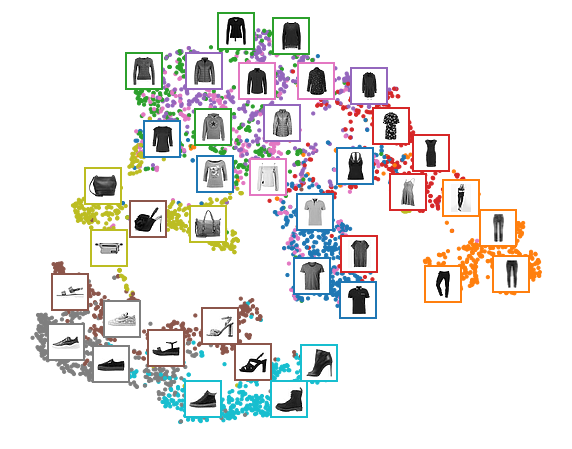

In [ ]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10

plt.scatter(X_valid_2D_norm[:, 0], X_valid_2D_norm[:, 1], c=y_valid, s=10, cmap="tab10")
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D_norm):
    #점하나하나 펼쳐진 모든 이미지와의 거리를 구해서 어느정도 특정 거리 이상이면 그 점에 해당하는 이미지를 보여줌
    dist = np.sum((position - image_positions) ** 2, axis=1)

    if np.min(dist) > 0.01: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

# Weights_Shared

In [ ]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        #transpose_b = True -> 두번째 행렬을 전치시키고 곱함
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [5]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [ ]:
stacked_autoencoder.summary()
print()
tied_ae.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 30)                81530     
                                                                 
 sequential_4 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82414     
                                                                 
Total params: 82,414
Trai

In [ ]:
history = tied_ae.fit(X_train, X_train, epochs=20,
                      validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3269 - rounded_accuracy: 0.8960 - val_loss: 0.3080 - val_rounded_accuracy: 0.9080
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2975 - rounded_accuracy: 0.9224 - val_loss: 0.2951 - val_rounded_accuracy: 0.9285
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2920 - rounded_accuracy: 0.9274 - val_loss: 0.3017 - val_rounded_accuracy: 0.9088
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2889 - rounded_accuracy: 0.9302 - val_loss: 0.2880 - val_rounded_accuracy: 0.9333
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2865 - rounded_accuracy: 0.9325 - val_loss: 0.2874 - val_rounded_accuracy: 0.9315
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2850 - rounded_accuracy: 0.9340 - val_loss: 0.2860 - val_rounded_accuracy: 0.9354
Epoch 7/20
1719/1719 [==================

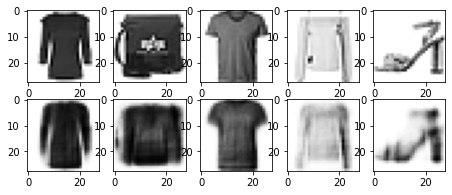

In [ ]:
show_reconstructions(tied_ae)
plt.show()

# Greedy_Layerwise_AutoEncoder_Training

In [ ]:
K = keras.backend

X_train_flatten = K.batch_flatten(X_train)
X_valid_flatten = K.batch_flatten(X_valid)

In [ ]:
#784 -> 100
enc1 = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[28*28], activation='selu'),
])
#100 -> 784
dec1 = keras.models.Sequential([
    keras.layers.Dense(28*28, input_shape=[100], activation='sigmoid'),
])
ae_1 = keras.models.Sequential([
    enc1,
    dec1,
])
ae_1.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
ae_1.fit(X_train_flatten, X_train_flatten, epochs=10, validation_data=[X_valid_flatten, X_valid_flatten])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3440 - rounded_accuracy: 0.8880 - val_loss: 0.3111 - val_rounded_accuracy: 0.9161
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3027 - rounded_accuracy: 0.9216 - val_loss: 0.2994 - val_rounded_accuracy: 0.9257
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2940 - rounded_accuracy: 0.9296 - val_loss: 0.2926 - val_rounded_accuracy: 0.9321
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2885 - rounded_accuracy: 0.9348 - val_loss: 0.2882 - val_rounded_accuracy: 0.9369
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2847 - rounded_accuracy: 0.9384 - val_loss: 0.2851 - val_rounded_accuracy: 0.9398
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2821 - rounded_accuracy: 0.9410 - val_loss: 0.2828 - val_rounded_accuracy: 0.9416
Epoch 7/10
1719/1719 [==================

In [ ]:
X_train_enc1 = enc1(X_train_flatten)
X_valid_enc1 = enc1(X_valid_flatten)

In [ ]:
#100 -> 30
enc2 = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=[100], activation='selu'),
])
#30 -> 100
dec2 = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[30], activation='selu'),
])
ae_2 = keras.models.Sequential([
    enc2,
    dec2,
])
ae_2.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.05))
ae_2.fit(X_train_enc1, X_train_enc1, epochs=10, validation_data=[X_valid_enc1, X_valid_enc1])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6558 - val_loss: 0.3667
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3056 - val_loss: 0.2851
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2639 - val_loss: 0.2591
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2501 - val_loss: 0.2389
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2310 - val_loss: 0.2194
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2202 - val_loss: 0.2166
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2170 - val_loss: 0.2182
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2143 - val_loss: 0.2214
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2140 - val_loss: 0.2132
Epoch 10/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.213

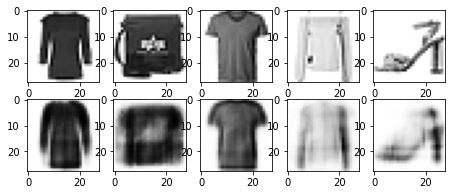

In [ ]:
stacked_ae = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])
show_reconstructions(stacked_ae)
plt.show()

In [ ]:
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2870 - rounded_accuracy: 0.9340 - val_loss: 0.2885 - val_rounded_accuracy: 0.9341
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2865 - rounded_accuracy: 0.9344 - val_loss: 0.2882 - val_rounded_accuracy: 0.9345
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2863 - rounded_accuracy: 0.9347 - val_loss: 0.2880 - val_rounded_accuracy: 0.9344
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2861 - rounded_accuracy: 0.9349 - val_loss: 0.2878 - val_rounded_accuracy: 0.9351
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2858 - rounded_accuracy: 0.9352 - val_loss: 0.2876 - val_rounded_accuracy: 0.9352
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2857 - rounded_accuracy: 0.9354 - val_loss: 0.2874 - val_rounded_accuracy: 0.9351
Epoch 7/10
1719/1719 [==================

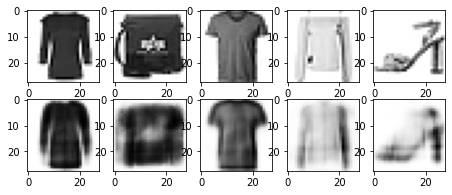

In [ ]:
show_reconstructions(stacked_ae)
plt.show()

# Convolutional_Autoencoder

In [ ]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 20s 7ms/step - loss: 0.3016 - rounded_accuracy: 0.9192 - val_loss: 0.2823 - val_rounded_accuracy: 0.9388
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2758 - rounded_accuracy: 0.9413 - val_loss: 0.2737 - val_rounded_accuracy: 0.9438
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2709 - rounded_accuracy: 0.9460 - val_loss: 0.2703 - val_rounded_accuracy: 0.9485
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2683 - rounded_accuracy: 0.9488 - val_loss: 0.2687 - val_rounded_accuracy: 0.9489
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2665 - rounded_accuracy: 0.9507 - val_loss: 0.2697 - val_rounded_accuracy: 0.9456


In [ ]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)        

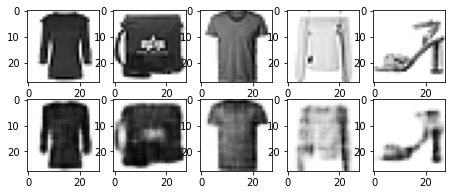

In [ ]:
show_reconstructions(conv_ae)
plt.show()

# Recurrent_Autoencoder

In [ ]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30),
])

recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation='sigmoid'))
])

recurrent_ae = keras.models.Sequential([
    recurrent_encoder,
    recurrent_decoder
])

recurrent_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])

In [ ]:
recurrent_encoder.summary()
recurrent_decoder.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 100)           51600     
                                                                 
 lstm_1 (LSTM)               (None, 30)                15720     
                                                                 
Total params: 67,320
Trainable params: 67,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 repeat_vector (RepeatVector  (None, 28, 30)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 28, 100)           52400     
                          

In [ ]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 27s 12ms/step - loss: 0.5055 - rounded_accuracy: 0.7681 - val_loss: 0.4378 - val_rounded_accuracy: 0.8087
Epoch 2/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3930 - rounded_accuracy: 0.8494 - val_loss: 0.3710 - val_rounded_accuracy: 0.8681
Epoch 3/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3634 - rounded_accuracy: 0.8711 - val_loss: 0.3637 - val_rounded_accuracy: 0.8713
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3515 - rounded_accuracy: 0.8796 - val_loss: 0.3474 - val_rounded_accuracy: 0.8856
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3421 - rounded_accuracy: 0.8856 - val_loss: 0.3402 - val_rounded_accuracy: 0.8873
Epoch 6/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3349 - rounded_accuracy: 0.8907 - val_loss: 0.3334 - val_rounded_accuracy: 0.8893
Epoch 7/10
1719/1719 [======

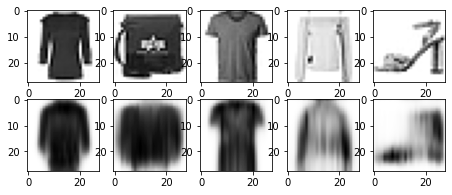

In [ ]:
show_reconstructions(recurrent_ae)
plt.show()

# GaussianNoise_Denoising_Autoencoder

In [ ]:
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28, 28]),
])

denoising_ae = keras.models.Sequential([
    denoising_encoder,
    denoising_decoder,
])
denoising_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])

In [ ]:
denoising_ae.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3493 - rounded_accuracy: 0.8782 - val_loss: 0.3178 - val_rounded_accuracy: 0.9080
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3134 - rounded_accuracy: 0.9085 - val_loss: 0.3098 - val_rounded_accuracy: 0.9146
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3070 - rounded_accuracy: 0.9139 - val_loss: 0.3038 - val_rounded_accuracy: 0.9181
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3028 - rounded_accuracy: 0.9176 - val_loss: 0.3002 - val_rounded_accuracy: 0.9220
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3000 - rounded_accuracy: 0.9200 - val_loss: 0.2980 - val_rounded_accuracy: 0.9229
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2979 - rounded_accuracy: 0.9219 - val_loss: 0.2962 - val_rounded_accuracy: 0.9263
Epoch 7/10
1719/1719 [==================

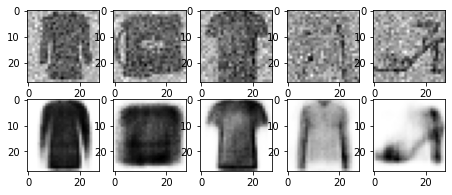

In [ ]:
noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

# Dropout_Restore_Autoencoder

In [ ]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28, 28]),
])
dropout_ae = keras.models.Sequential([
    dropout_encoder,
    dropout_decoder,
])
dropout_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])

In [ ]:
history = dropout_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3532 - rounded_accuracy: 0.8740 - val_loss: 0.3186 - val_rounded_accuracy: 0.9048
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3169 - rounded_accuracy: 0.9042 - val_loss: 0.3101 - val_rounded_accuracy: 0.9129
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3111 - rounded_accuracy: 0.9088 - val_loss: 0.3053 - val_rounded_accuracy: 0.9172
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3076 - rounded_accuracy: 0.9117 - val_loss: 0.3025 - val_rounded_accuracy: 0.9201
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3050 - rounded_accuracy: 0.9138 - val_loss: 0.2995 - val_rounded_accuracy: 0.9213
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3029 - rounded_accuracy: 0.9156 - val_loss: 0.2988 - val_rounded_accuracy: 0.9204
Epoch 7/10
1719/1719 [==================

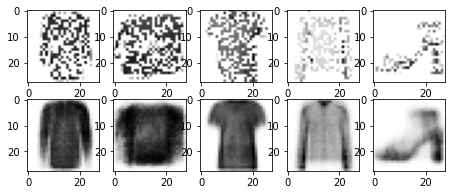

In [ ]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))

# Sparse_AutoEncoder

- compared_simple_encoder

In [ ]:
#비교군
simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="sigmoid"),
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.),
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=10,
                        validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4273 - rounded_accuracy: 0.8008 - val_loss: 0.3759 - val_rounded_accuracy: 0.8508
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3599 - rounded_accuracy: 0.8679 - val_loss: 0.3492 - val_rounded_accuracy: 0.8792
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3395 - rounded_accuracy: 0.8867 - val_loss: 0.3350 - val_rounded_accuracy: 0.8909
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3270 - rounded_accuracy: 0.8973 - val_loss: 0.3242 - val_rounded_accuracy: 0.9014
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3200 - rounded_accuracy: 0.9026 - val_loss: 0.3200 - val_rounded_accuracy: 0.9048
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3167 - rounded_accuracy: 0.9050 - val_loss: 0.3170 - val_rounded_accuracy: 0.9063
Epoch 7/10
1719/1719 [==================

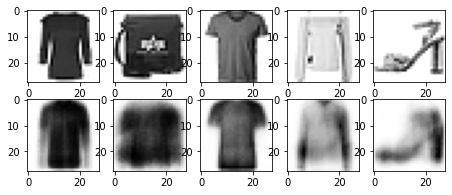

In [ ]:
show_reconstructions(simple_ae)
plt.show()

In [12]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)
    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

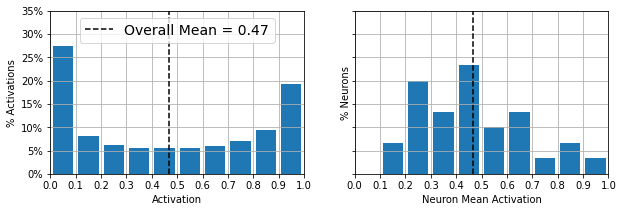

In [ ]:
#simple_encoder(x) -> N , 30
plot_activations_histogram(simple_encoder, height=0.35)
plt.show()

- sparse_autoencoder

In [ ]:
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4297 - rounded_accuracy: 0.8164 - val_loss: 0.3837 - val_rounded_accuracy: 0.8503
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3692 - rounded_accuracy: 0.8690 - val_loss: 0.3653 - val_rounded_accuracy: 0.8755
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3539 - rounded_accuracy: 0.8804 - val_loss: 0.3501 - val_rounded_accuracy: 0.8816
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3429 - rounded_accuracy: 0.8884 - val_loss: 0.3414 - val_rounded_accuracy: 0.8898
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3357 - rounded_accuracy: 0.8935 - val_loss: 0.3352 - val_rounded_accuracy: 0.8939
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3299 - rounded_accuracy: 0.8983 - val_loss: 0.3294 - val_rounded_accuracy: 0.9012
Epoch 7/10
1719/1719 [==================

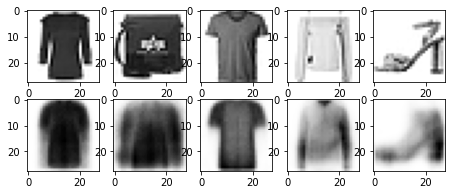

In [ ]:
show_reconstructions(sparse_l1_ae)
plt.show()

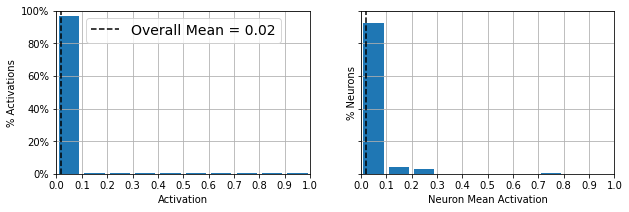

In [ ]:
plot_activations_histogram(sparse_l1_encoder, height=1.)
plt.show()

# Kullback-Leibier_Divergence

(0.0, 1.0, 0.0, 1.0)

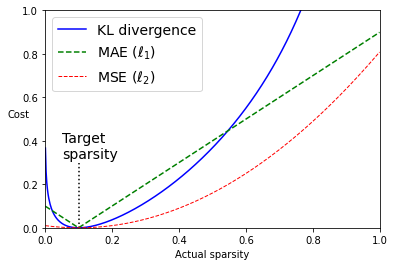

In [ ]:
#타깃 희소값
p = 0.1
#현재 희소값
q = np.linspace(0.001, 0.999, 500)
#쿨백 라이블러 계산
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
#mse 
mse = (p - q)**2
#mas
mae = np.abs(p - q)

plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 1])

# KLDivergence_Regularizer

In [6]:
K = keras.backend

kl_divergence = keras.losses.kullback_leibler_divergence
#kl_divergence([0.1], [0.05])

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    
    def __call__(self, inputs):
        #각 데이터에 관한 평균 뉴런 활성화 정도 (batch_size, units) -> (units, )
        mean_activities = K.mean(inputs, axis=0)
        kl_div_value = kl_divergence(self.target, mean_activities) + kl_divergence(1. - self.target, 1. - mean_activities)
        return self.weight * kl_div_value

In [ ]:

kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)

sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    #뉴런에 kl div 적용
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])

sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])

In [ ]:
history = sparse_kl_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4133 - rounded_accuracy: 0.8133 - val_loss: 0.3692 - val_rounded_accuracy: 0.8596
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3505 - rounded_accuracy: 0.8784 - val_loss: 0.3414 - val_rounded_accuracy: 0.8874
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3317 - rounded_accuracy: 0.8939 - val_loss: 0.3269 - val_rounded_accuracy: 0.8997
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3209 - rounded_accuracy: 0.9032 - val_loss: 0.3203 - val_rounded_accuracy: 0.9048
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3161 - rounded_accuracy: 0.9069 - val_loss: 0.3165 - val_rounded_accuracy: 0.9084
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3128 - rounded_accuracy: 0.9100 - val_loss: 0.3132 - val_rounded_accuracy: 0.9108
Epoch 7/10
1719/1719 [=================

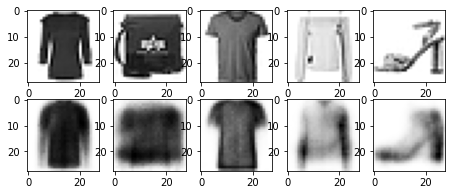

In [ ]:
show_reconstructions(sparse_kl_ae)
plt.show()

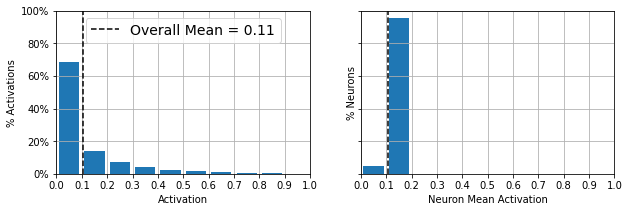

In [ ]:
plot_activations_histogram(sparse_kl_encoder)
plt.show()

# Variational_Autoencoder

In [7]:
class Sampling(keras.layers.Layer):
    #평균, 분산의 로그
    def call(self, inputs):
        mean, log_var = inputs
        #평균이 0, 표준편차가 1 인 정규분포에 표준편차를 곱하고, 평균을 더한다.
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [ ]:
codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation='selu')(z)
z = keras.layers.Dense(100, activation='selu')(z) 
#평균코딩층
codings_mean = keras.layers.Dense(coding_size)(z)
#log var 층
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


In [ ]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation='selu')(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)

outputs = keras.layers.Reshape([28,28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

In [ ]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = - 0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis=1
)

variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[rounded_accuracy])

In [ ]:
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128, validation_data=[X_valid, X_valid])

Epoch 1/25
430/430 [==============================] - 6s 10ms/step - loss: 0.3893 - rounded_accuracy: 0.8613 - val_loss: 0.3600 - val_rounded_accuracy: 0.8904
Epoch 2/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3437 - rounded_accuracy: 0.8972 - val_loss: 0.3414 - val_rounded_accuracy: 0.9013
Epoch 3/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3339 - rounded_accuracy: 0.9044 - val_loss: 0.3322 - val_rounded_accuracy: 0.9077
Epoch 4/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3283 - rounded_accuracy: 0.9087 - val_loss: 0.3257 - val_rounded_accuracy: 0.9140
Epoch 5/25
430/430 [==============================] - 4s 8ms/step - loss: 0.3250 - rounded_accuracy: 0.9114 - val_loss: 0.3280 - val_rounded_accuracy: 0.9102
Epoch 6/25
430/430 [==============================] - 4s 9ms/step - loss: 0.3227 - rounded_accuracy: 0.9131 - val_loss: 0.3228 - val_rounded_accuracy: 0.9159
Epoch 7/25
430/430 [==============================]

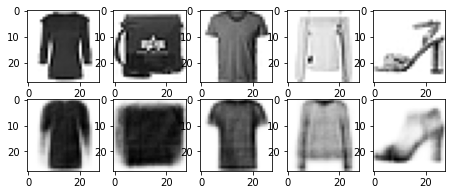

In [ ]:
show_reconstructions(variational_ae)
plt.show()

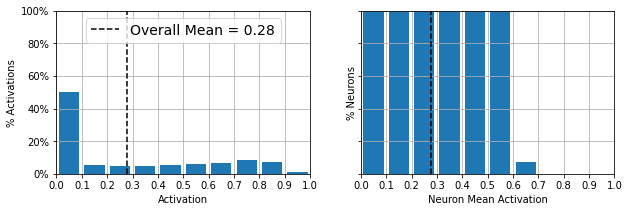

In [ ]:
plot_activations_histogram(variational_ae)
plt.show()

# Generate_Images

In [ ]:
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()

In [10]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols*2, n_rows*2))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")


In [ ]:
plot_multiple_images(images, 4)

# Generative_Adversarial_Network

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
#판별자를 훈련하고, GAN을 훈련할때(생성자) 판별자가 훈련되면 안된다.
#GAN을 컴파일하기전에 discriminator.trainable = False 로 지정하면 gan 의 함수 호출시에는 판별자가 훈련되지않는다.
#반면 판별자의 함수 호출시에는 훈련이 된다.
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)    

In [11]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()                                                    # not shown

Epoch 1/1


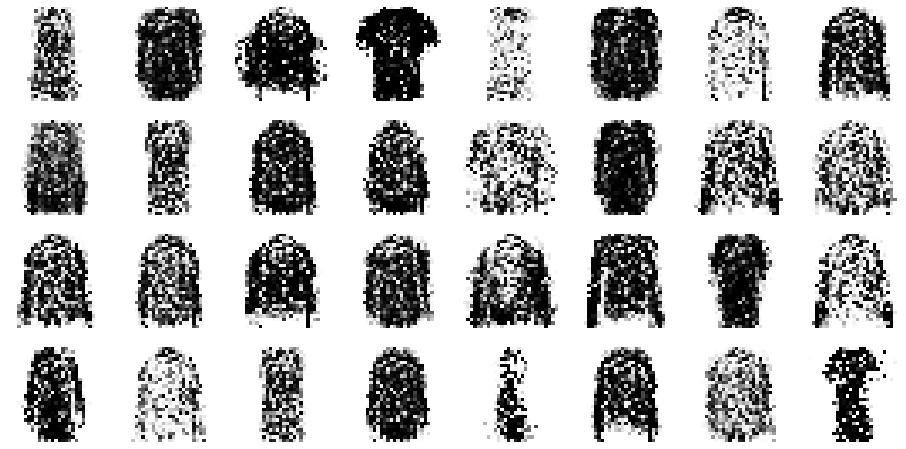

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

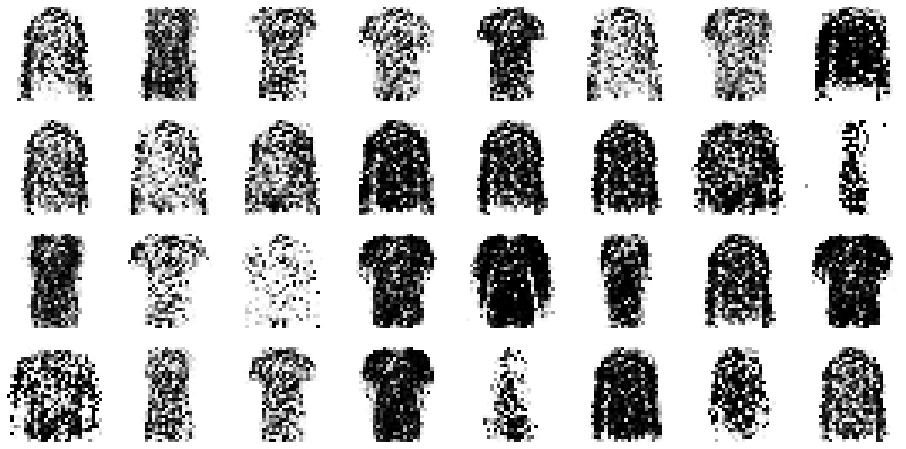

In [ ]:
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

Epoch 1/15


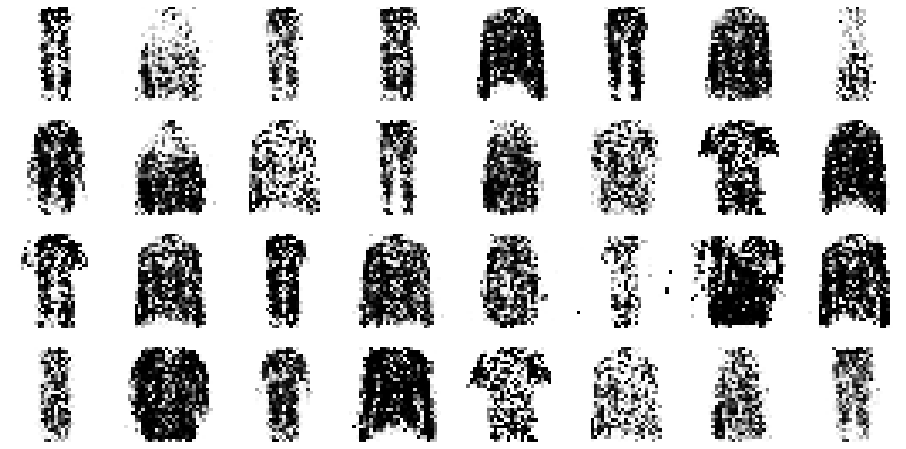

Epoch 2/15


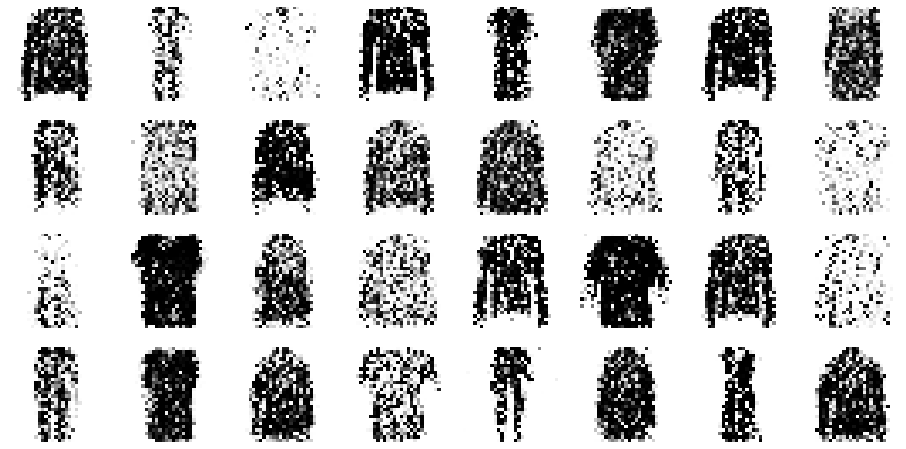

Epoch 3/15


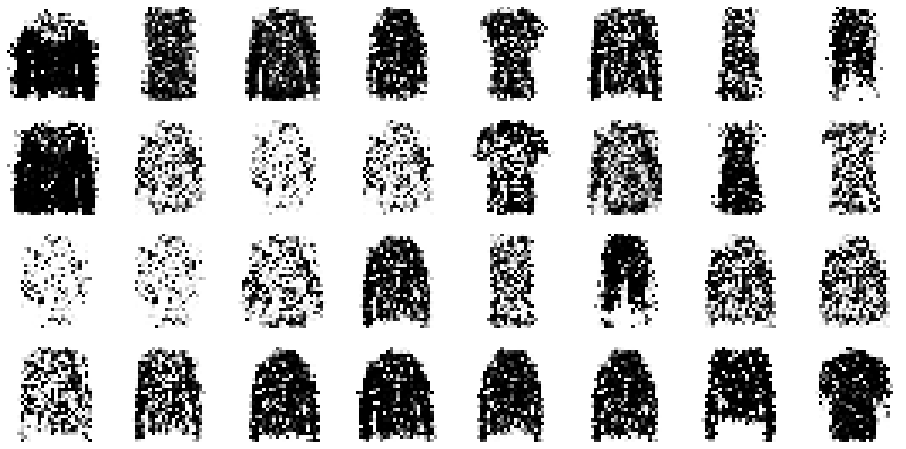

Epoch 4/15


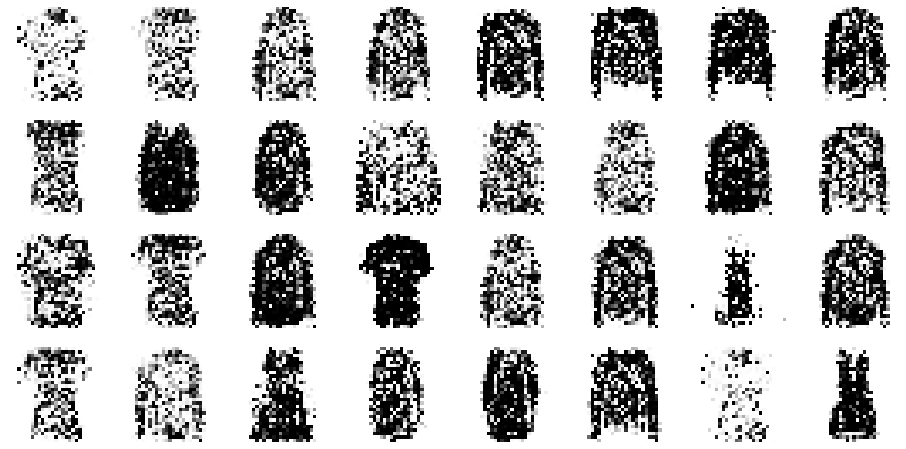

Epoch 5/15


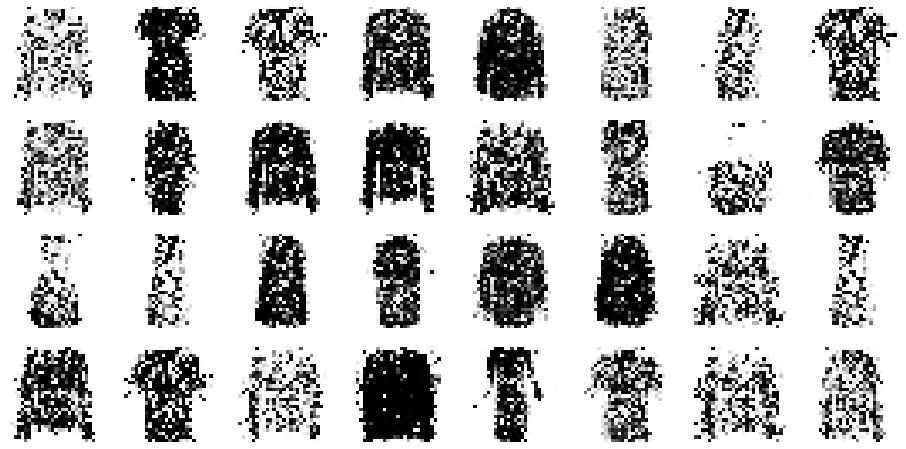

Epoch 6/15


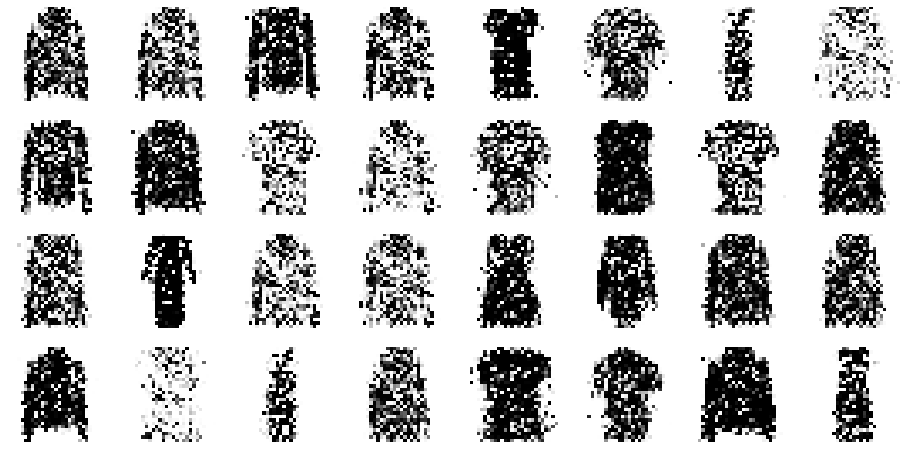

Epoch 7/15


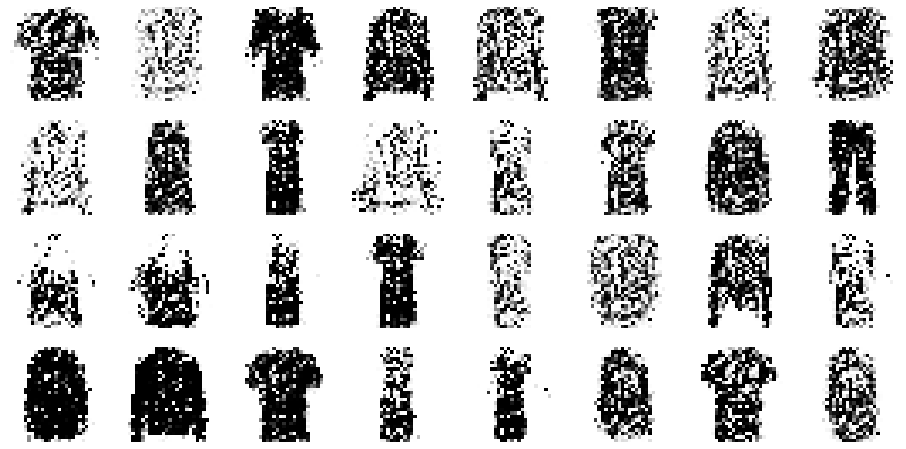

Epoch 8/15


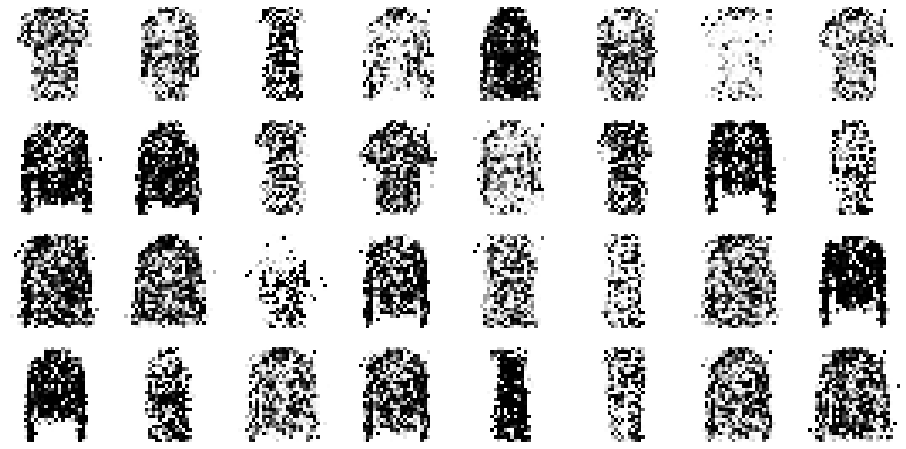

Epoch 9/15


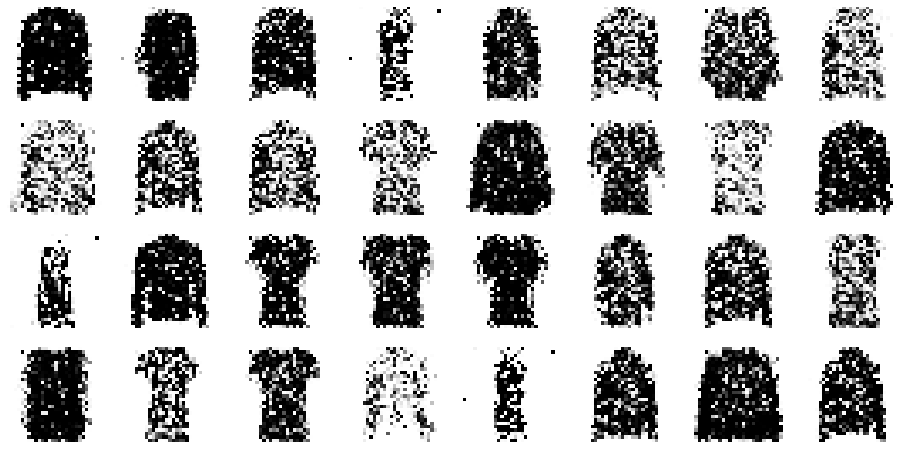

Epoch 10/15


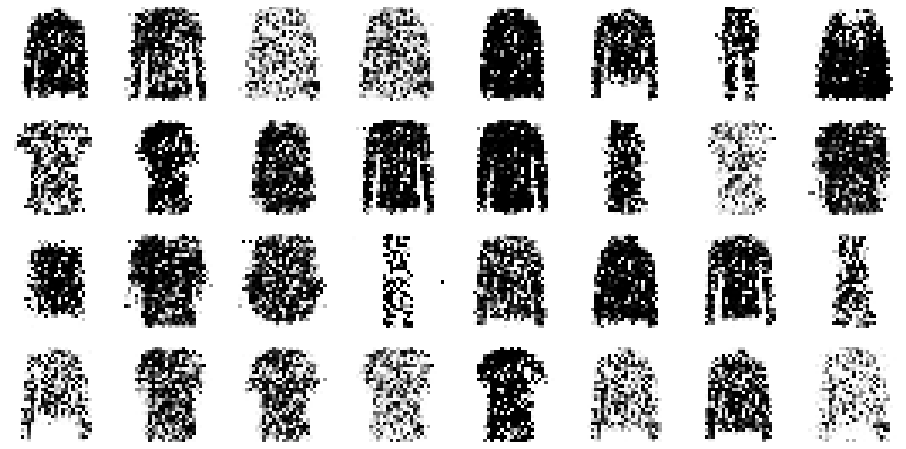

Epoch 11/15


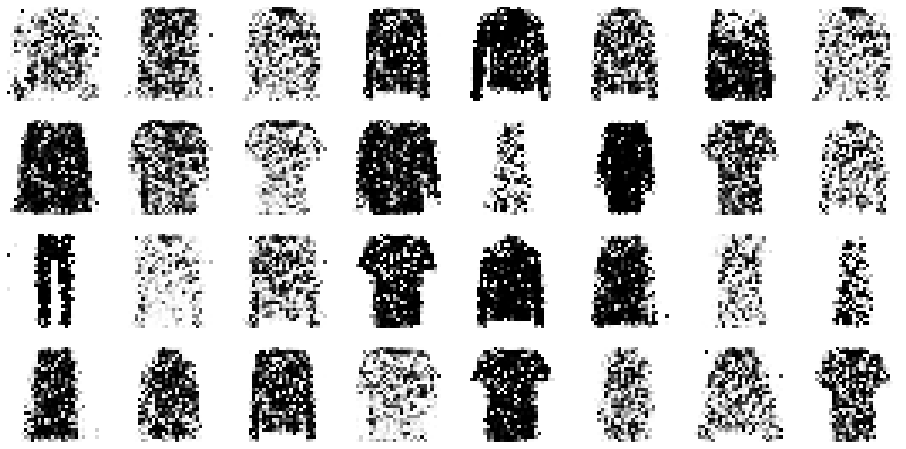

Epoch 12/15


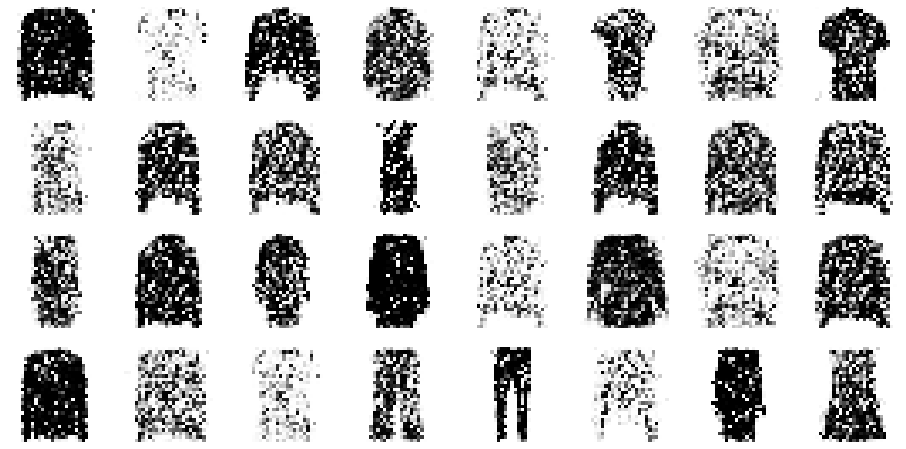

Epoch 13/15


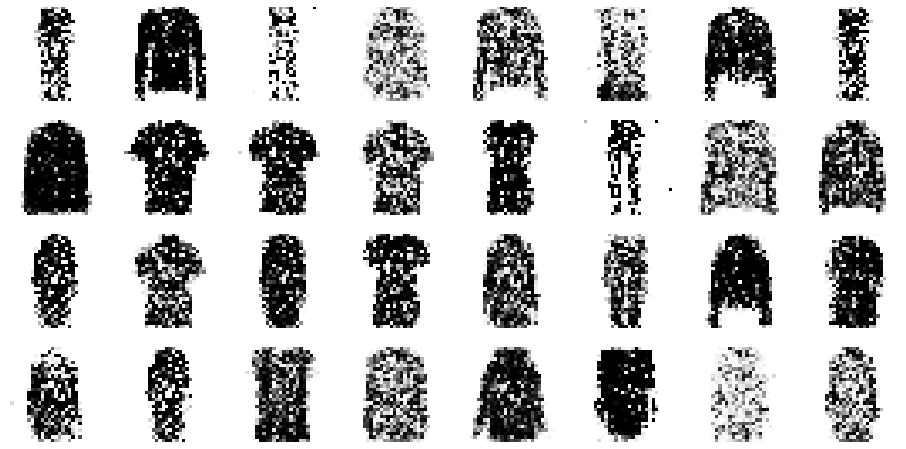

Epoch 14/15


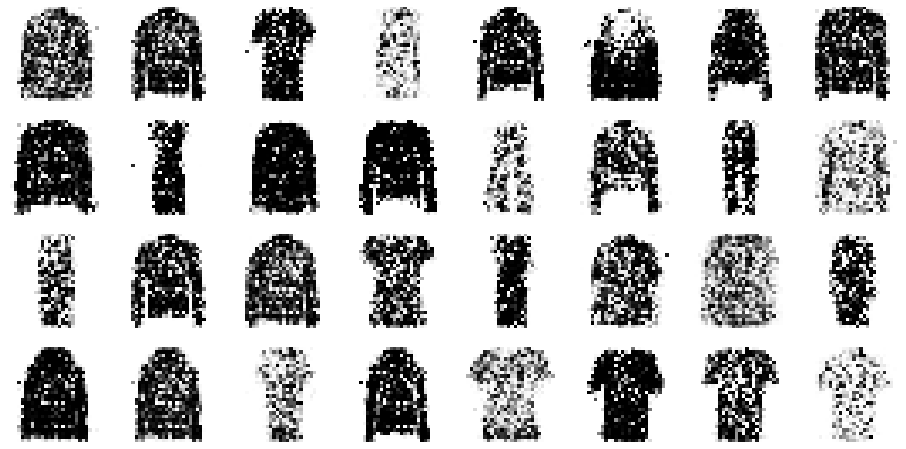

Epoch 15/15


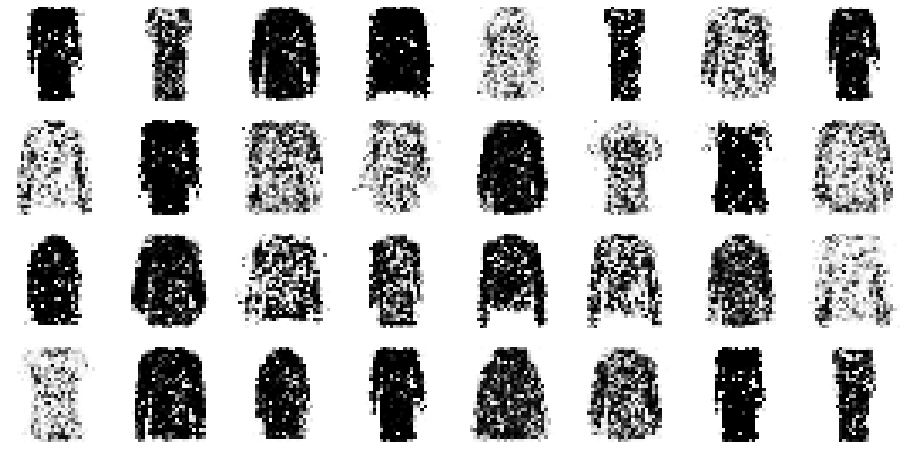

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, 15)

# Deep_Convolution_GA_Network

In [68]:
seed_value = 42

In [69]:
seed_value *= 2
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7*7*128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same', activation='selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh'),
])

discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding='same', activation=keras.layers.LeakyReLU(0.2), input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding='same', activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='softmax')
])

dc_gan = keras.models.Sequential([
    generator,
    discriminator
])
generator.summary()
discriminator.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_26 (Bat  (None, 7, 7, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_transpose_26 (Conv2D  (None, 14, 14, 64)       204864    
 Transpose)                                                      
                                                                 
 batch_normalization_27 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                     

In [70]:
discriminator.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.0015))
discriminator.trainbale = False
dc_gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [71]:
#generator 의 출력 activation 이 -1 ~ 1 이기 때문에 입력이미지도 -1 ~ 1 사이로 스케일해준다.
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [72]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

Epoch 1/15


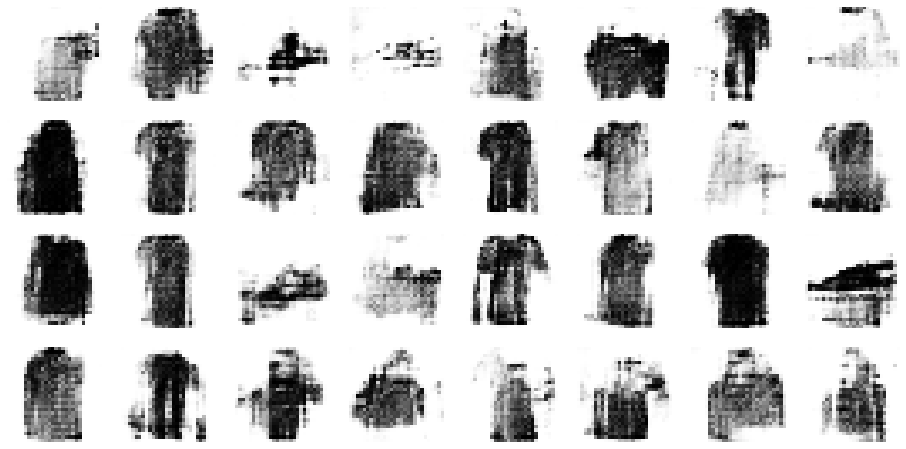

Epoch 2/15


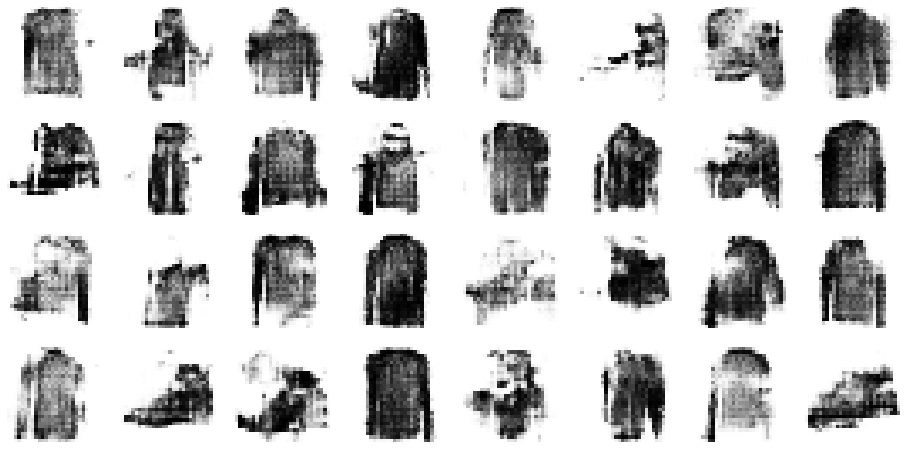

Epoch 3/15


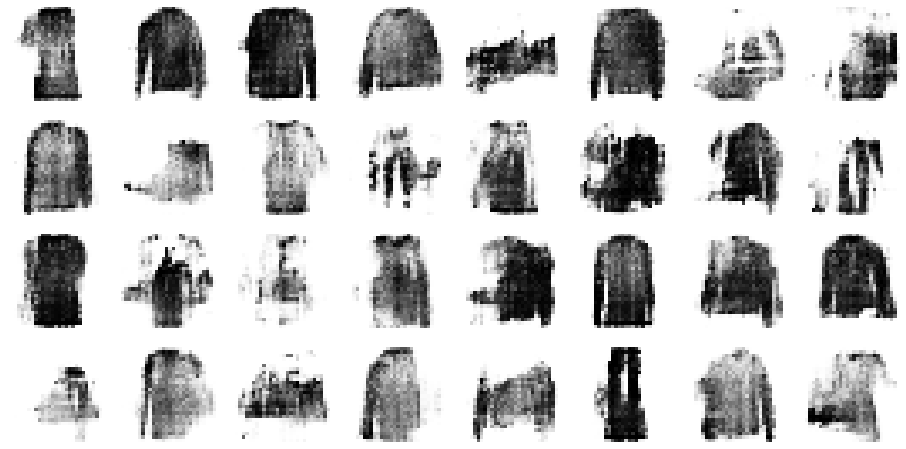

Epoch 4/15


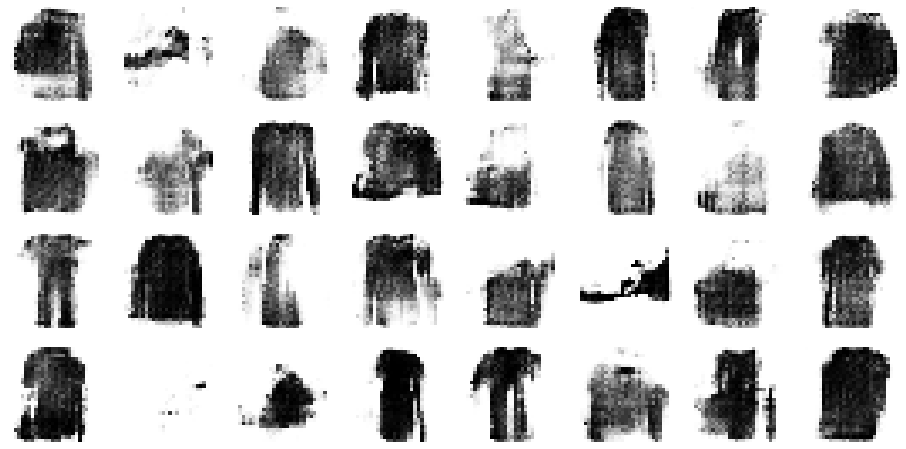

Epoch 5/15


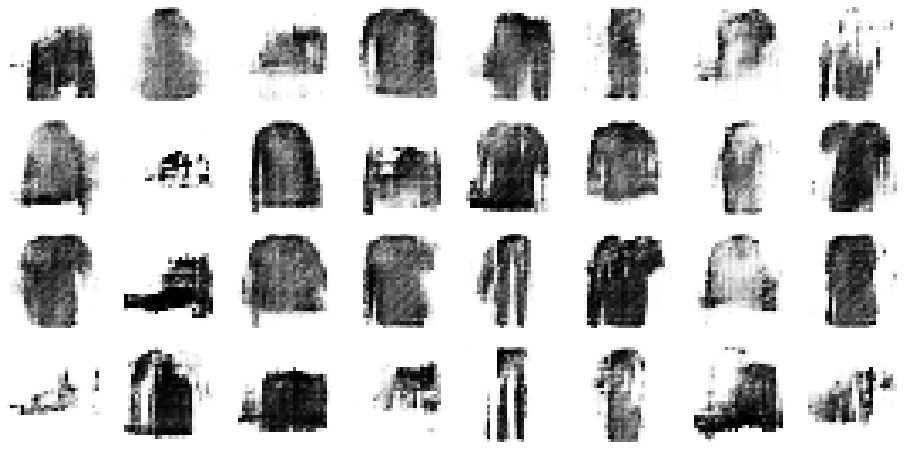

Epoch 6/15


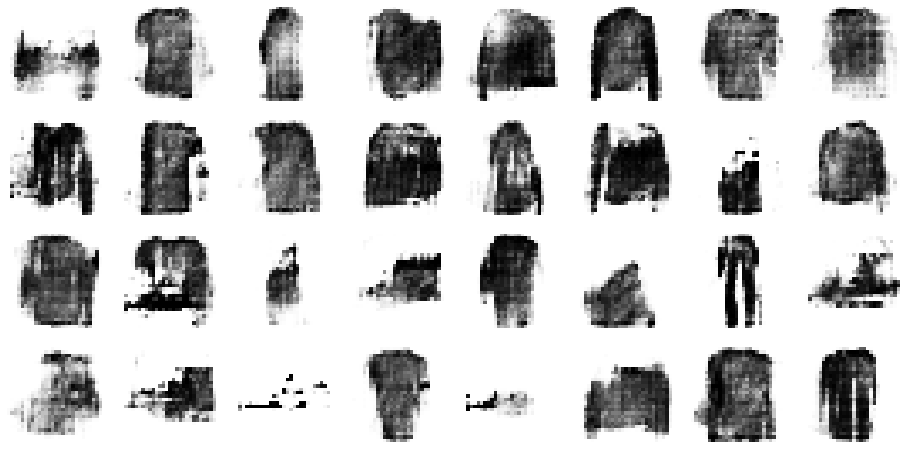

Epoch 7/15


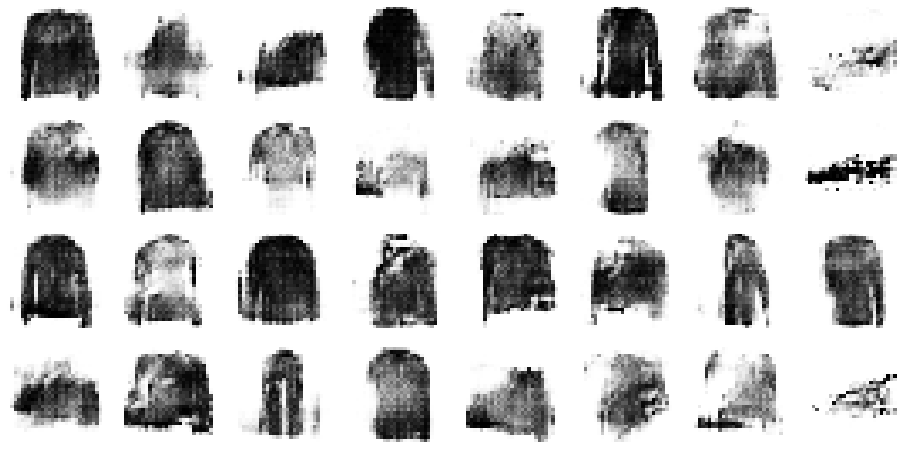

Epoch 8/15


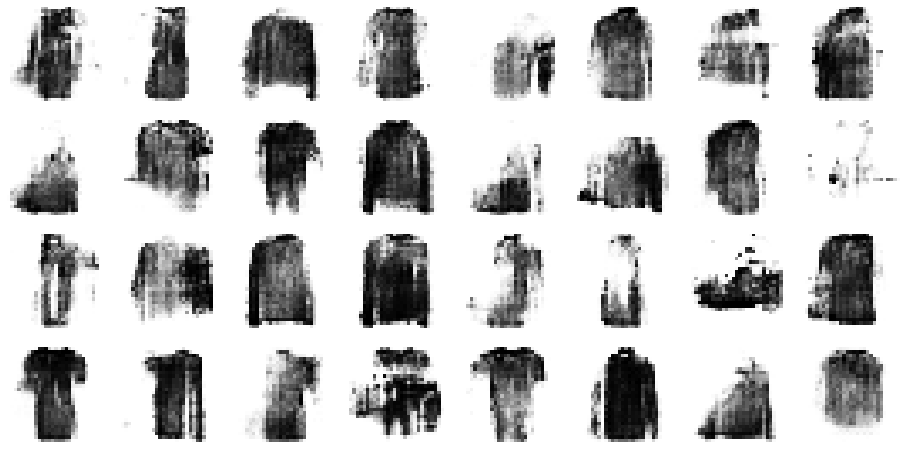

Epoch 9/15


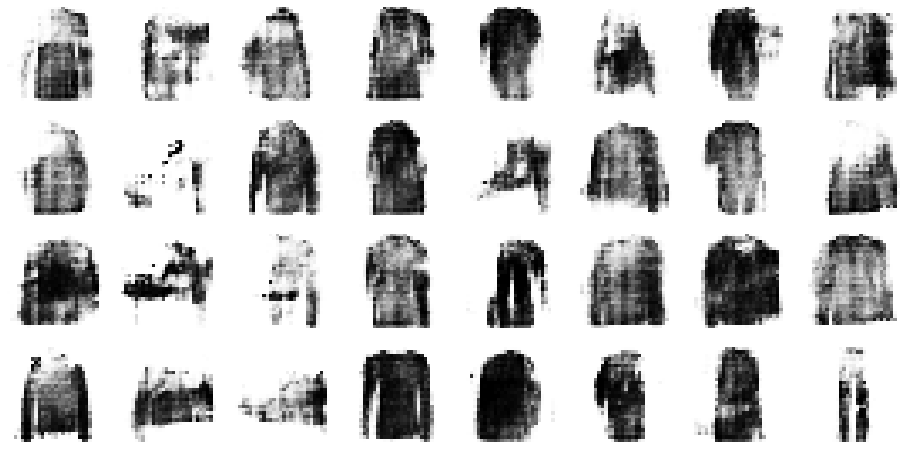

Epoch 10/15


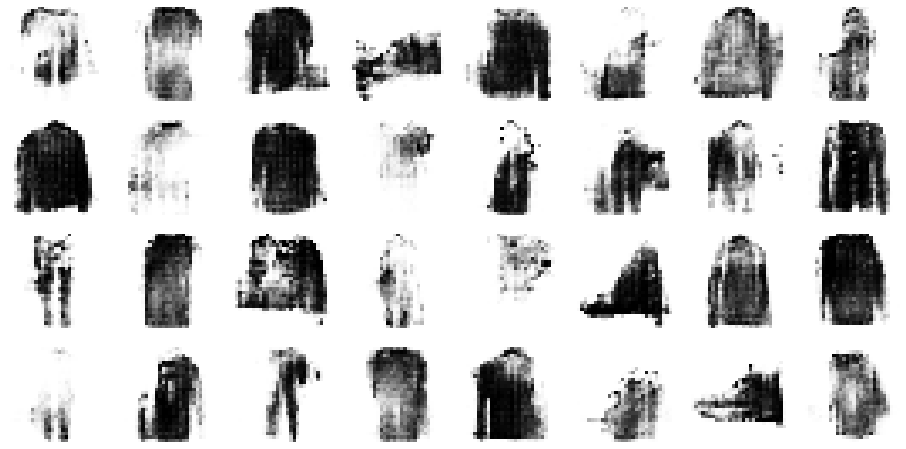

Epoch 11/15


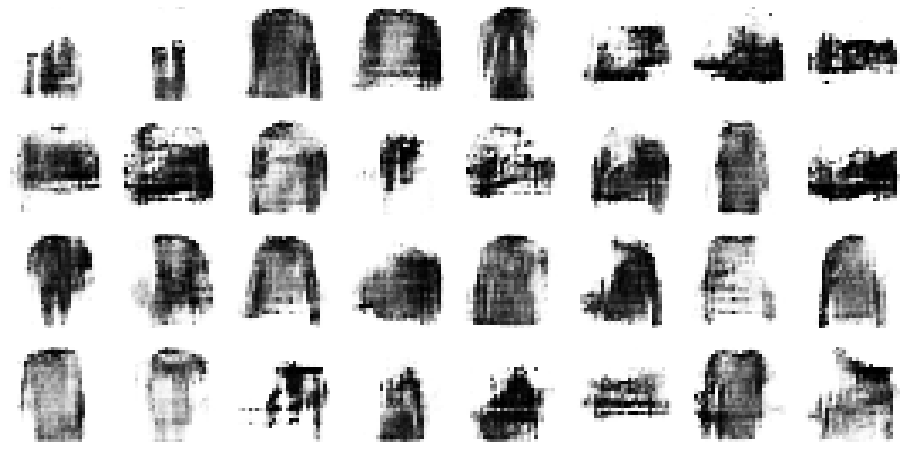

Epoch 12/15


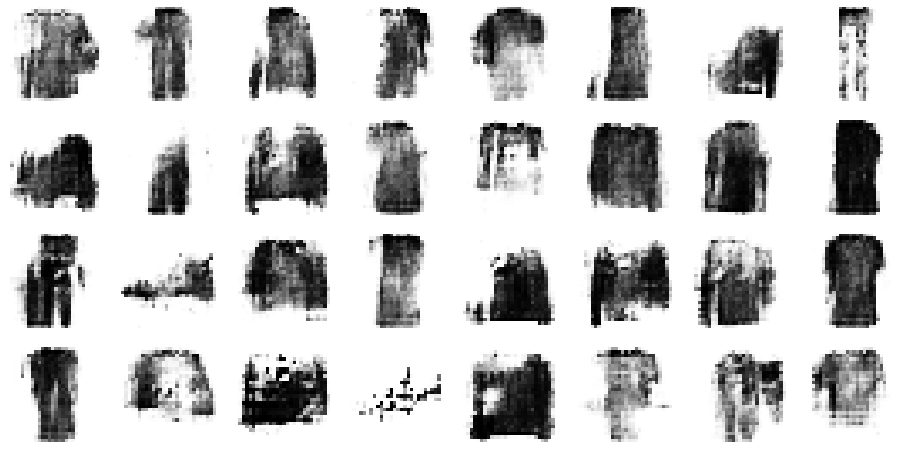

Epoch 13/15


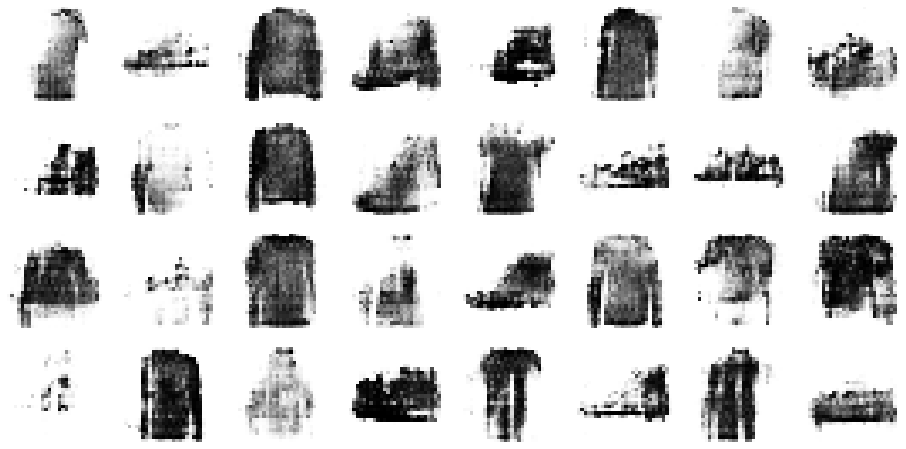

Epoch 14/15


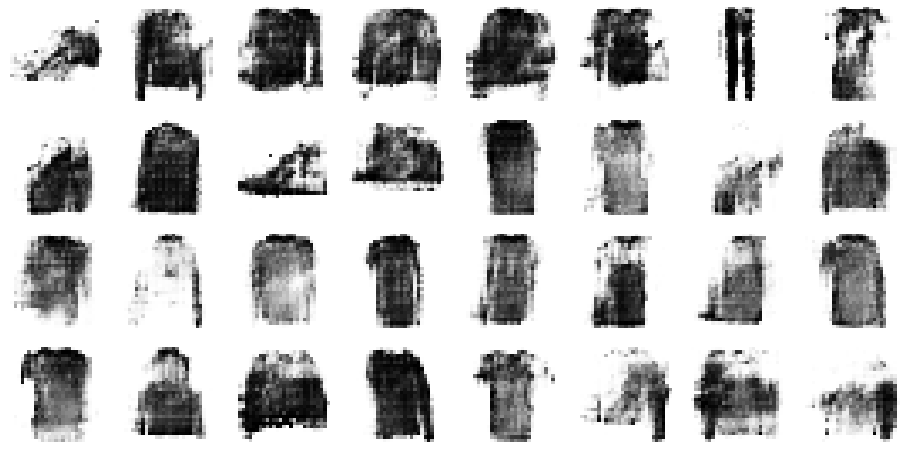

Epoch 15/15


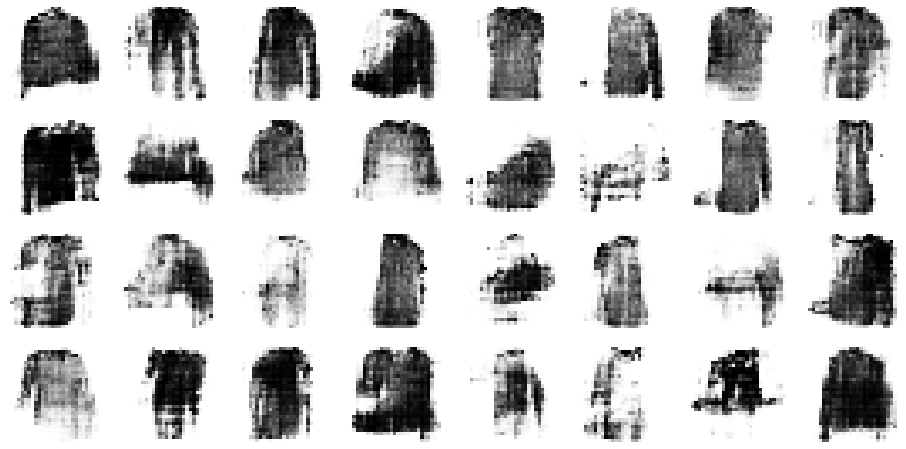

In [73]:
train_gan(dc_gan, dataset, batch_size, codings_size, 15)

In [ ]:
train_gan(dc_gan, dataset, batch_size, codings_size, 15)

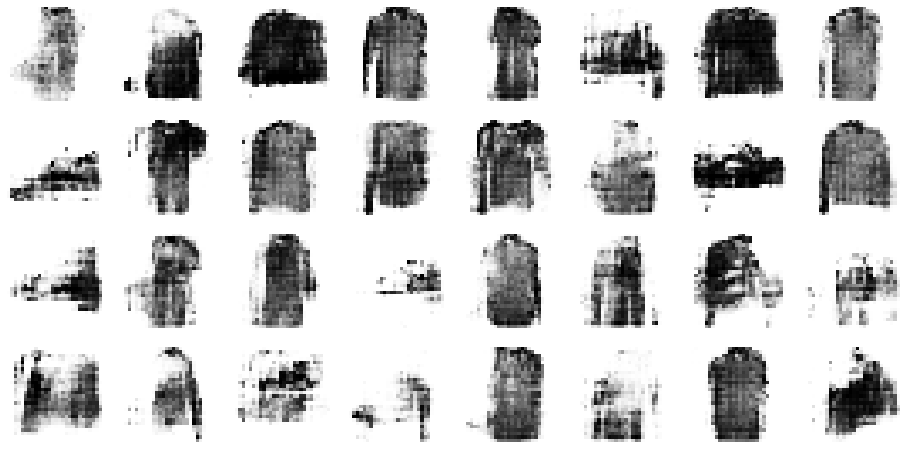

In [74]:
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

# Binary_AutoEncoder_Hashing

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
hashing_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.GaussianNoise(15.),
    keras.layers.Dense(16, activation="sigmoid"),
])
hashing_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[16]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
hashing_ae = keras.models.Sequential([hashing_encoder, hashing_decoder])
hashing_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(), metrics=[rounded_accuracy])

In [9]:
history = hashing_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4078 - rounded_accuracy: 0.8145 - val_loss: 0.3925 - val_rounded_accuracy: 0.8223
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3710 - rounded_accuracy: 0.8475 - val_loss: 0.3707 - val_rounded_accuracy: 0.8442
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3587 - rounded_accuracy: 0.8575 - val_loss: 0.3609 - val_rounded_accuracy: 0.8529
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3524 - rounded_accuracy: 0.8646 - val_loss: 0.3560 - val_rounded_accuracy: 0.8597
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3489 - rounded_accuracy: 0.8674 - val_loss: 0.3469 - val_rounded_accuracy: 0.8715
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3464 - rounded_accuracy: 0.8707 - val_loss: 0.3450 - val_rounded_accuracy: 0.8763
Epoch 7/10
1719/1719 [==================

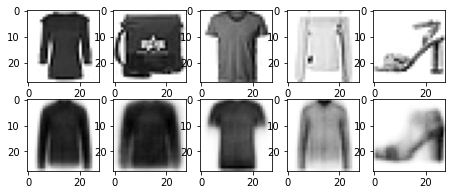

In [11]:
show_reconstructions(hashing_ae)
plt.show()

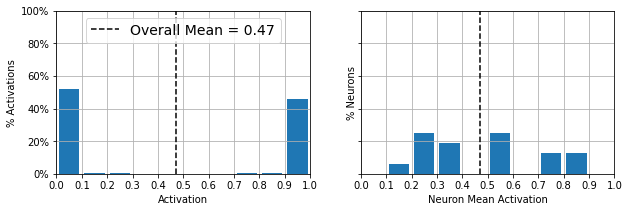

In [13]:
plot_activations_histogram(hashing_encoder)
plt.show()

In [24]:
hashes = np.round(hashing_encoder.predict(X_valid[:100])).astype(np.int32)
hashes *= np.array([[2**bit for bit in range(16)]])
hashes = hashes.sum(axis=1)
for h in hashes[:5]:
    print(h , "{:016b}".format(h))
print(',,,')

31329 0111101001100001
31264 0111101000100000
30240 0111011000100000
16961 0100001001000001
36876 1001000000001100
,,,
